### Classify the email using the binary classification method. Email Spam detection has two
### states: a) Normal State Not Spam, b) Abnormal State Spam. Use K-Nearest Neighbors 
### and Support Vector Machine for classification. Analyze their performance.
### Dataset link: The emails.csv dataset on the Kaggle 
### https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv

### Rushikesh Chavan | 41214

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [11]:
df = pd.read_csv('emails.csv')

In [12]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [13]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [14]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [16]:
df.dtypes

Email No.     object
the            int64
to             int64
ect            int64
and            int64
               ...  
military       int64
allowing       int64
ff             int64
dry            int64
Prediction     int64
Length: 3002, dtype: object

In [17]:
df.drop(columns=['Email No.'], inplace=True)
df.dtypes
# drop email no

the           int64
to            int64
ect           int64
and           int64
for           int64
              ...  
military      int64
allowing      int64
ff            int64
dry           int64
Prediction    int64
Length: 3001, dtype: object

In [18]:
df.isnull().any().value_counts()
#checking null values

False    3001
dtype: int64

In [19]:
X = df.iloc[:,1:3001]
X

,to,ect,and,for,of,a,you,hou,in,on,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,1,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13,24,6,6,2,102,1,27,18,21,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,8,0,0,4,2,...,0,0,0,0,0,0,0,0,0,0
3,5,22,0,5,1,51,2,10,1,5,...,0,0,0,0,0,0,0,0,0,0
4,6,17,1,5,2,57,0,9,3,12,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,3,0,0,32,0,0,5,6,...,0,0,0,0,0,0,0,0,0,0
5168,27,11,2,6,5,151,4,3,23,18,...,0,0,0,0,0,0,0,1,0,0
5169,0,1,1,0,0,11,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
5170,7,1,0,2,1,28,2,0,8,11,...,0,0,0,0,0,0,0,1,0,1


In [20]:
Y = df.iloc[:,-1].values
Y

array([0, 0, 0, ..., 1, 1, 0])

In [21]:
#splitting data into training and testing 
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size = 0.25)

### support vector machines

In [22]:
svc = SVC(C=1.0,kernel='rbf',gamma='auto')         
# C here is the regularization parameter. Here, L2 penalty is used(default). It is the inverse of the strength of regularization.
# As C increases, model overfits.
# Kernel here is the radial basis function kernel.
# gamma (only used for rbf kernel) : As gamma increases, model overfits.
svc.fit(train_x,train_y)
y_pred2 = svc.predict(test_x)
print("Accuracy Score for SVC : ", accuracy_score(y_pred2,test_y))

Accuracy Score for SVC :  0.9025522041763341


### K Nearest Neighbours Algorithm

In [23]:
knn = KNeighborsClassifier(n_neighbors=7)
  
knn.fit(train_x, train_y)
  
# Predict on dataset which model has not seen before
print(knn.predict(test_x))
# Predict the future.
print("Accuracy Score of the above model :" , knn.score(test_x, test_y))

[0 1 0 ... 0 1 0]
Accuracy Score of the above model : 0.8762567672080434


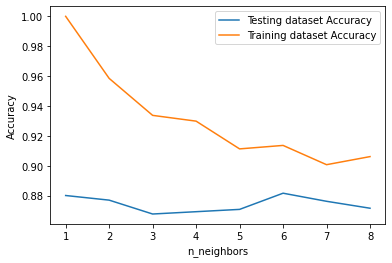

In [24]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_x, train_y)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(train_x, train_y)
    test_accuracy[i] = knn.score(test_x, test_y)
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()